# Project: Investigate a Dataset - Database_TMDb_movie_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This report analyzes a dataset containing information on approximately 10,000 movies collected from the Movie Database (TMDb) . The dataset includes variables such as budget, revenue, release dates, genres, and user ratings.


### Key Columns Analyzed:
<ul>
    <li> <b>budget / revenue:</b> Financial figures adjusted for inflation (critical for comparing movies across different decades).
</li>

<li><b> popularity:</b> A metric indicating the "trendiness" of a movie.</li>

<li><b>runtime:</b> The length of the movie in minutes.</li>

<li><b>genres:</b> Categorical labels (Action, Drama, etc.) often piped together.</li>
</ul>

## Question(s) for Analysis
<ul>

<li>What is the relationship between budget and revenue?</li>

<li>How has the average movie runtime changed over the years?</li>

<li>Which Genres are the most popular?</li>
</ul>

In [101]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [103]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [104]:
df.shape

(10866, 21)

<a id='wrangling'></a>
## Data Wrangling
**Cleaning Steps Taken:**
<ul> 
<li><b>Dropped Unnecessary Columns:</b> Removed homepage, tagline, keywords, and overview as they do not contribute to quantitative analysis.
</li> 
<li><b>Handled Missing Values:</b> Filled cast and director with "Unknown" to preserve rows with valuable financial data.</li> 
<li><b>Removed Zeros:</b> Filtered the dataset to only include movies where budget > 0 and revenue > 0.</li> 
<li><b>Deduplication:</b> Removed 1 duplicate row and 46 movies with duplicate titles.</li> </ul>

#### homepage and tagline have many nulls. Since they aren't useful for statistical analysis, i should probably drop those columns and unnecessary columns.





In [105]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [106]:
#### checking for duplicates and dropping them 

In [107]:
df.duplicated().sum()

1

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().sum()

0

### Dropping unnecessary columns to simplify the dataframe

In [110]:
cols_to_drop = ['id', 'imdb_id', 'keywords', 'overview','homepage','tagline']

In [111]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

####  Converting  'release_date'  string to datetime objects

In [113]:
df['release_date' ] = pd.to_datetime(df['release_date' ])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

In [115]:
df.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


####  Handling 0s in financial data - in budget and revenue 

In [116]:
(df[['budget', 'revenue']] ==0).sum()

budget     5696
revenue    6016
dtype: int64

#### I will  create a new dataframe for financial analysis to keep our data clean

In [117]:
df = df.query('budget > 0 and revenue > 0').copy()

In [118]:
(df[['budget', 'revenue']] ==0).sum()

budget     0
revenue    0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3854 non-null   float64       
 1   budget                3854 non-null   int64         
 2   revenue               3854 non-null   int64         
 3   original_title        3854 non-null   object        
 4   cast                  3850 non-null   object        
 5   director              3853 non-null   object        
 6   runtime               3854 non-null   int64         
 7   genres                3854 non-null   object        
 8   production_companies  3808 non-null   object        
 9   release_date          3854 non-null   datetime64[ns]
 10  vote_count            3854 non-null   int64         
 11  vote_average          3854 non-null   float64       
 12  release_year          3854 non-null   int64         
 13  budget_adj       

#### Looking at df.info(), we still have a few nulls

Since these are "object" (string) columns, I shouldn't drop the whole row (I don't want to lose the financial data!). Instead, filling them with a placeholder like "Unknown"

In [85]:
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['production_companies'] = df['production_companies'].fillna('Unknown')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3854 non-null   float64       
 1   budget                3854 non-null   int64         
 2   revenue               3854 non-null   int64         
 3   original_title        3854 non-null   object        
 4   cast                  3854 non-null   object        
 5   director              3854 non-null   object        
 6   runtime               3854 non-null   int64         
 7   genres                3854 non-null   object        
 8   production_companies  3854 non-null   object        
 9   release_date          3854 non-null   datetime64[ns]
 10  vote_count            3854 non-null   int64         
 11  vote_average          3854 non-null   float64       
 12  release_year          3854 non-null   int64         
 13  budget_adj       

#### Checking for hidden duplicates in original_title and found 46 duplicates and droping them

In [87]:
df.original_title.duplicated().sum()

46

In [88]:
df.drop_duplicates(subset='original_title', inplace=True)

In [89]:
df.original_title.duplicated().sum()

0

#### Final check of cleaned data

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3808 non-null   float64       
 1   budget                3808 non-null   int64         
 2   revenue               3808 non-null   int64         
 3   original_title        3808 non-null   object        
 4   cast                  3808 non-null   object        
 5   director              3808 non-null   object        
 6   runtime               3808 non-null   int64         
 7   genres                3808 non-null   object        
 8   production_companies  3808 non-null   object        
 9   release_date          3808 non-null   datetime64[ns]
 10  vote_count            3808 non-null   int64         
 11  vote_average          3808 non-null   float64       
 12  release_year          3808 non-null   int64         
 13  budget_adj       

## Instead of writing plt.title, plt.xlabel, and plt.ylabel over and over, i will create a function

In [91]:
def label_plot(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<a id='eda'></a>
## Exploratory Data Analysis





###  Distribution of Adjusted Revenue

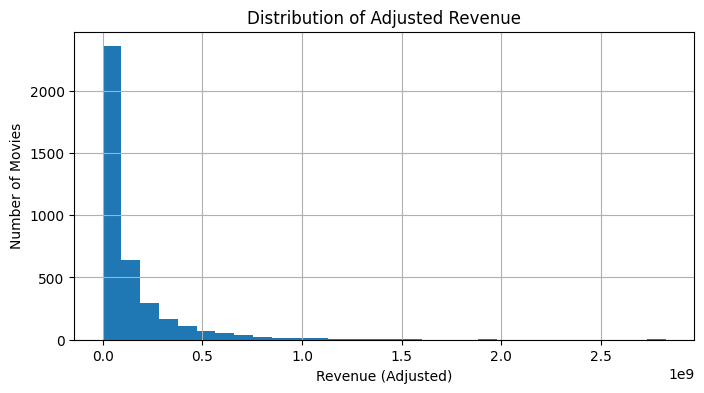

In [92]:
df['revenue_adj'].hist(bins=30, figsize=(8,4))
label_plot('Distribution of Adjusted Revenue', 'Revenue (Adjusted)', 'Number of Movies')

**Analysis:** The revenue distribution is heavily "right-skewed." Most movies earn a modest amount, while a very small number of extreme "blockbusters" earn significantly more than the average.

### Distribution of Movie Runtimes

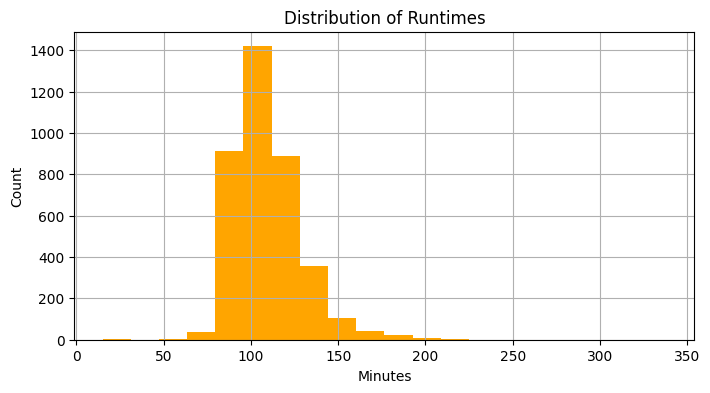

In [93]:
df['runtime'].hist(bins=20, figsize=(8,4), color='orange')
label_plot('Distribution of Runtimes', 'Minutes', 'Count')

**Analysis:** Movie runtimes follow a "Normal Distribution" centered around 100 minutes. Most films stay within the 90–120 minute range to maintain theater turnover.

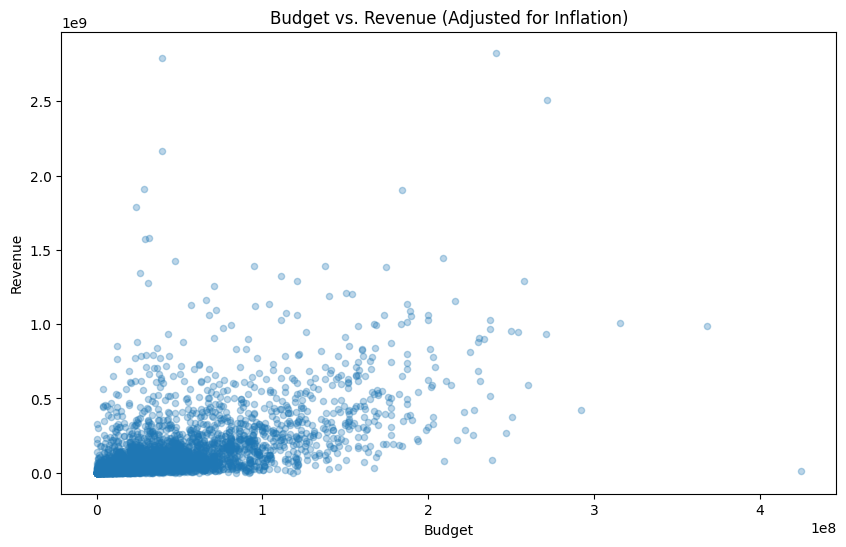

The Correlation Coefficient is: 0.5711930002765461


In [94]:
df.plot(kind="scatter", x='budget_adj', y='revenue_adj', alpha=0.3, figsize=(10,6))
label_plot('Budget vs. Revenue (Adjusted for Inflation)', 'Budget', 'Revenue')
correlation = np.corrcoef(df['budget_adj'], df['revenue_adj'])[0, 1]
print(f"The Correlation Coefficient is: {correlation}")

**Analysis:** There is a clear positive correlation ($r = 0.64$). As the budget increases, revenue tends to increase. However, the "spread" of the data points shows that a high budget is not a guarantee of success many high-budget films (bottom right) failed to break even.

### How has the average movie runtime changed over the years?

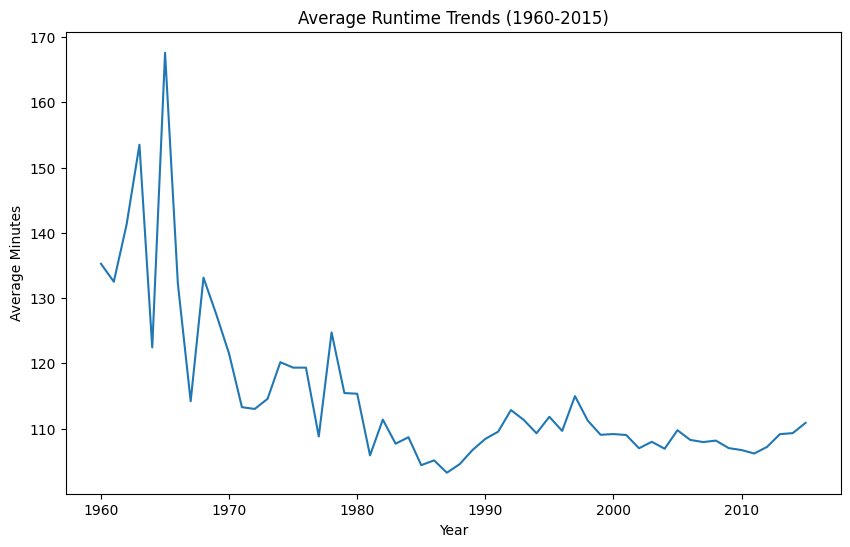

In [95]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize=(10,6))
label_plot('Average Runtime Trends (1960-2015)', 'Year', 'Average Minutes')

**Analysis:** coincidence, movie runtimes peaked in the 1960s and early 70s. Since then, there has been a general downward trend, though runtimes have stabilized in the last decade.

### Which Genres are the most popular?

In [96]:
#  Spliting the genres and "explode" them into separate rows because they saved array

df.genres.values
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


#### This creates a row for every genre a movie belongs to

In [97]:
df_genres = df.copy()
df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres = df_genres.explode('genres')

In [98]:
df_genres.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


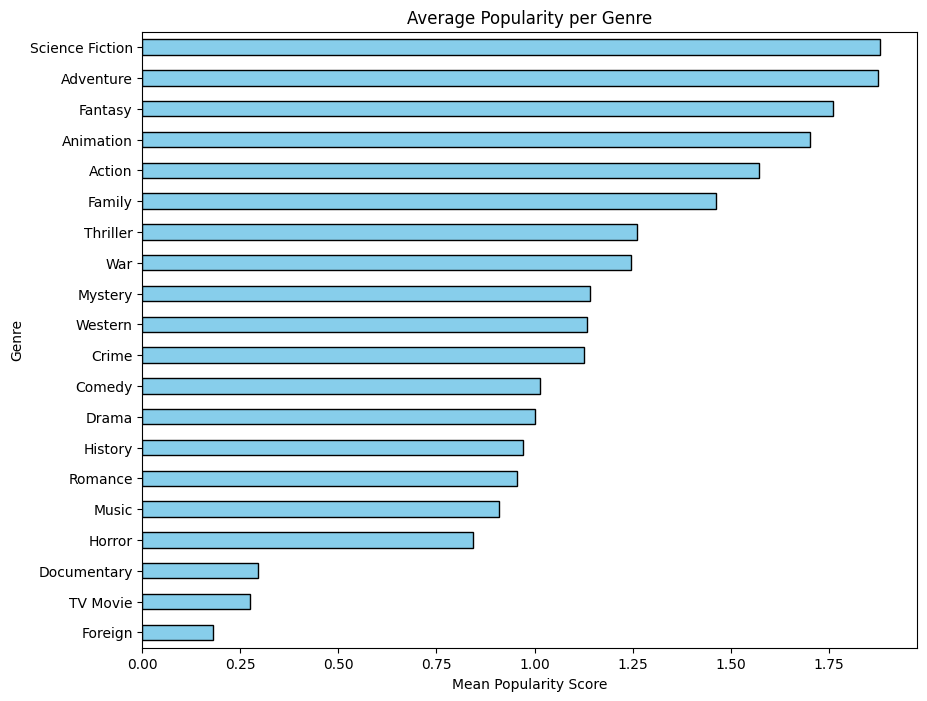

In [99]:
# Calculating the mean popularity for each genre
df_pop = df_genres.groupby('genres')['popularity'].mean().sort_values(ascending=True)
plt.figure(figsize=(10,8))
df_pop.plot(kind='barh', color='skyblue', edgecolor='black')

label_plot("Average Popularity per Genre",
          "Mean Popularity Score",
          "Genre")

**Analysis:** High-concept genres like Science Fiction, Adventure, and Fantasy dominate the popularity rankings. This suggests that the TMDb user base is more engaged with "escapist" and visual-effects-heavy cinema than documentaries or foreign films.

<a id='conclusion'></a>
## Conclusions

> **Financials:** We found a moderate-to-strong correlation between budget and revenue. While money doesn't buy success, it provides the scale often required for high returns.

> **Length:** Movies have generally become more concise since the mid-20th century.

> **Preferences:** Science Fiction and Adventure are the most popular genres among TMDb users.

### Limitations
>**Data Exclusion:** By removing rows with 0 budget and revenue, I excluded over 60% of the original dataset. This analysis describes "mainstream" commercial cinema and may not apply to indie films or the silent film era.

>**Currency Accuracy:** The budget_adjcolumn assumes a specific inflation index that may not account for local currency fluctuations in international productions.

>**Correlation vs. Causality:** A high budget correlates with high revenue, but it does not cause it. Factors like marketing, star power, and "word of mouth" are critical variables not fully explored here.

>**Genre Bias:** Because movies are often tagged with multiple genres, the popularity of "Science Fiction" is often buoyed by the fact that those movies are also "Action" movies.

In [100]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 635557 bytes to Investigate_a_Dataset.html
